# Name: Aditya Chede
# Bharat Intern Data Science Internship
## Task: NumberRecognition
Handwritten digit recognition system not only detects scanned images of handwritten digits. Handwritten digit recognition using 
MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten 
digits.

## Dataset Used: MNSIT Dataset


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

In [2]:
# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tensorflow
from tensorflow import keras

In [3]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

## Dividing the data into train and test data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


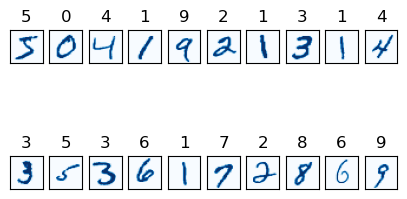

In [9]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [10]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

## Building neural network that can read handwritten digits.

In [11]:
# Creating a Sequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Displaying Neural Network Model
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[-0.7175007 ,  0.05589879, -0.1138609 , -0.17422625, -0.22526433,
        -0.3832624 ,  0.44052038, -0.04644754, -0.17056467,  0.7412836 ]],
      dtype=float32)

In [21]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.0478035 , 0.10359596, 0.08742128, 0.08230019, 0.07820514,
        0.06677556, 0.15218851, 0.09351783, 0.08260209, 0.20558988]],
      dtype=float32)

In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

## Model Fitting

In [23]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2922 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1414 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9768


In [24]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0822 - accuracy: 0.9754 - 1s/epoch - 4ms/step


[0.08219395577907562, 0.9753999710083008]

In [25]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.0392865e-08, 1.0095316e-08, 4.4709344e-05, 1.6437136e-04,
        2.2225223e-11, 5.5190164e-08, 2.2131012e-15, 9.9978966e-01,
        2.0060433e-08, 1.0874587e-06],
       [9.7317567e-09, 1.0179652e-04, 9.9988627e-01, 8.8889274e-06,
        2.3564740e-16, 1.2456209e-07, 1.2670659e-09, 1.5121580e-13,
        2.8779464e-06, 2.7348629e-15],
       [1.8094607e-07, 9.9924171e-01, 5.8810489e-05, 1.4548193e-05,
        1.6716601e-04, 2.6450261e-05, 9.8195715e-06, 2.9212551e-04,
        1.8664873e-04, 2.5636682e-06],
       [9.9993896e-01, 2.9614972e-08, 1.3904566e-05, 2.3785556e-07,
        2.6621851e-07, 8.8347228e-08, 1.0649060e-05, 2.8273998e-05,
        2.3911306e-09, 7.6264150e-06],
       [3.0656192e-06, 3.8621671e-08, 2.5175634e-05, 6.5004023e-08,
        9.9826765e-01, 7.8921154e-08, 5.0258268e-07, 5.1394204e-04,
        1.6576040e-07, 1.1892813e-03]], dtype=float32)>

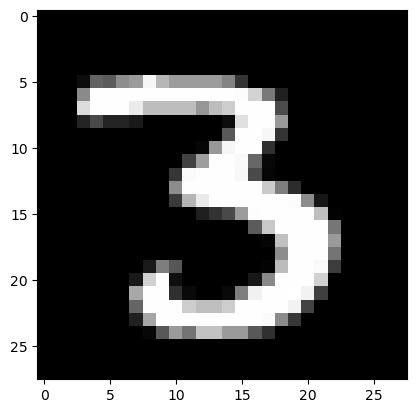

In [26]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [27]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 171ms/step
predicted : 3


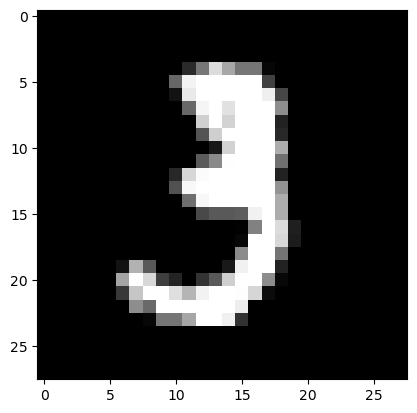

In [28]:
# Displaying a Grayscale Image
img = x_train[10]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [29]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 35ms/step
predicted : 3


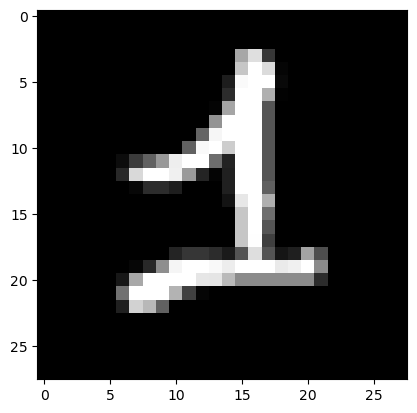

In [30]:
# Displaying a Grayscale Image
img = x_train[24]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [31]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 32ms/step
predicted : 1
